In [6]:
# Import tensorflow.keras
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential #allows us to build a model with a sequential order of layers
from tensorflow.keras.layers import Dense #tf terminology for "Fully-Connected Layers" of Neurons
from tensorflow.keras.utils import to_categorical

In [37]:
# Check if you are in the right environment
!which jupyter

/Users/anja.jesierski/opt/anaconda3/envs/dl/bin/jupyter


---

### Where to Begin Practicing: MNIST

In [13]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

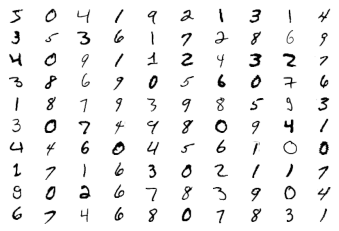

In [15]:
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [16]:
# Inspect the shape of X
X_train.shape
# 60_000 images/numbers
# each image is 28x28 pixels
# if the images were color images the shape would be (60000, 28, 28, 3)

(60000, 28, 28)

In [17]:
# Inspect the shape of y
y_train.shape

(60000,)

In [42]:
# Inspect y
y_train[:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

In [43]:
# Look at the shape of a single image
X_train[0].shape

(28, 28)

In [44]:
# We want the input image to be a flat array.
X_train[0].reshape(-1,).shape

(784,)

In [45]:
X_train[0].reshape(784,).shape

(784,)

In [46]:
# Flatten the input
X_train = X_train.reshape(60000, -1)
X_train.shape

(60000, 784)

In [47]:
# Understand what it means to flatten the images
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's build a model

There will be two intricacies you have to take care of.

1. Defining the right input shape
2. Dealing with the shape of y

### Mini-Projects this Week:
- Neural Network From Scratch
- Classifying Handwritten Digits (MNIST)
    - Fashion MNIST: https://github.com/zalandoresearch/fashion-mnist
- Transfer Learning for Image Recognition
    - Up to you!

In [48]:
from tensorflow.keras.utils import to_categorical

In [49]:
y_train = to_categorical(y_train)

## Base model
Dense, input layer and output layer, both activation sigmoid

In [50]:
model = Sequential([
    Dense(units=10 ,activation='sigmoid' , input_shape=(784,)), # hidden layer
#    Dense(units=5, activation='sigmoid'), # second hidden layer
    Dense(units=10, activation='sigmoid') # output layer
    # softmax is an extension of the sigmoid activation to multiple classes
])

In [51]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, batch_size=32, epochs=4, validation_split=0.2)

Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6101 - accuracy: 0.5161 - val_loss: 0.8065 - val_accuracy: 0.7989
Epoch 2/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.7550 - accuracy: 0.7956 - val_loss: 0.6456 - val_accuracy: 0.8106
Epoch 3/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6285 - accuracy: 0.8176 - val_loss: 0.5474 - val_accuracy: 0.8394
Epoch 4/4
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5807 - accuracy: 0.8249 - val_loss: 0.5334 - val_accuracy: 0.8402


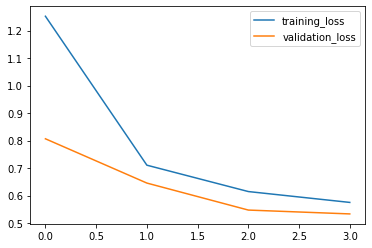

In [53]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()

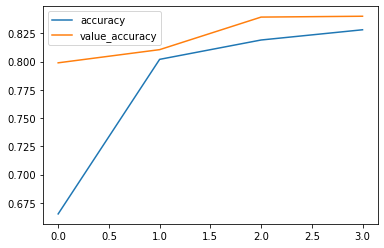

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [55]:
# Evaluate the model
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 2s 939us/step - loss: 0.5556 - accuracy: 0.8325


[0.5556180477142334, 0.8325499892234802]

In [56]:
X_test = X_test.reshape(10000, -1)
X_test.shape

(10000, 784)

In [57]:
y_test.shape

(10000,)

In [58]:
y_test = to_categorical(y_test)

In [59]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.8373


[0.5473109483718872, 0.8373000025749207]

### More models to improve score

In [60]:
model_a = Sequential([
    Dense(units=10 ,activation='relu' , input_shape=(784,)), # hidden layer
    #Dense(units=10, activation='relu'), # second hidden layer
    Dense(units=10, activation='sigmoid') # output layer
])

In [61]:
model_a.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history_a = model_a.fit(X_train, y_train, batch_size=32, epochs=4, validation_split=0.2)

Epoch 1/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5440 - accuracy: 0.4337 - val_loss: 1.6172 - val_accuracy: 0.4360
Epoch 2/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5452 - accuracy: 0.4361 - val_loss: 1.6815 - val_accuracy: 0.4364
Epoch 3/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5430 - accuracy: 0.4392 - val_loss: 1.7975 - val_accuracy: 0.4359
Epoch 4/4
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5190 - accuracy: 0.4448 - val_loss: 1.5679 - val_accuracy: 0.4527


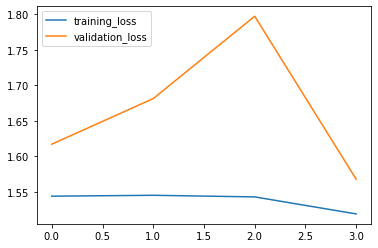

In [71]:
plt.plot(history_a.history['loss'], label='training_loss')
plt.plot(history_a.history['val_loss'], label='validation_loss')
plt.legend()

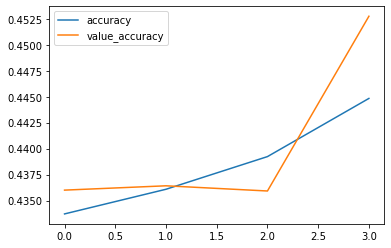

In [72]:
plt.plot(history_a.history['accuracy'], label='accuracy')
plt.plot(history_a.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [106]:
model_a.evaluate(X_train, y_train), model_a.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.7181 - accuracy: 0.4509


([1.4834294319152832, 0.4537999927997589],
 [1.7180949449539185, 0.45089998841285706])

In [74]:
model_b = Sequential([
    Dense(units=10 ,activation='sigmoid' , input_shape=(784,)), # hidden layer
    #Dense(units=10, activation='sigmoid'), # second hidden layer
    Dense(units=10, activation='sigmoid') # output layer
])

In [75]:
model_b.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
history_b = model_b.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 1.7947 - accuracy: 0.4591 - val_loss: 0.9224 - val_accuracy: 0.7761
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8514 - accuracy: 0.7779 - val_loss: 0.6490 - val_accuracy: 0.8150
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6454 - accuracy: 0.8127 - val_loss: 0.5601 - val_accuracy: 0.8467
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5791 - accuracy: 0.8331 - val_loss: 0.5277 - val_accuracy: 0.8535
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5482 - accuracy: 0.8397 - val_loss: 0.5204 - val_accuracy: 0.8518
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5422 - accuracy: 0.8423 - val_loss: 0.4873 - val_accuracy: 0.8645
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5156 - accuracy: 0.8531 - val_loss: 0.4728 - val_accuracy:

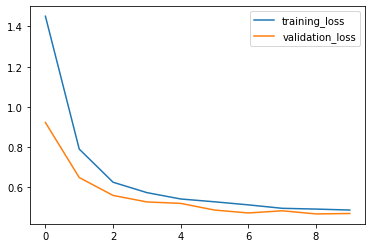

In [77]:
plt.plot(history_b.history['loss'], label='training_loss')
plt.plot(history_b.history['val_loss'], label='validation_loss')
plt.legend()

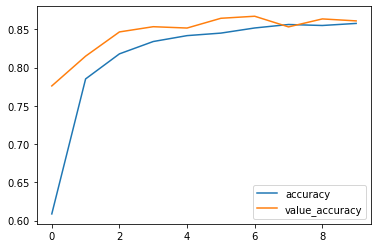

In [78]:
plt.plot(history_b.history['accuracy'], label='accuracy')
plt.plot(history_b.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [107]:
model_b.evaluate(X_train, y_train), model_b.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4595 - accuracy: 0.8626


([0.4756830334663391, 0.857450008392334],
 [0.4595302641391754, 0.8626000285148621])

## Regularize a MNIST model

In [115]:
model_d = Sequential([
    Dense(units=25 ,activation='sigmoid' , input_shape=(784,)), # hidden layer
    Dense(units=25, activation='sigmoid'), # second hidden layer, 25 neurons
    Dense(units=25, activation='sigmoid'), # third hidden layer, 25 neurons
    Dense(units=25, activation='sigmoid'), # fourth hidden layer, 25 neurons
    Dense(units=25, activation='sigmoid'), # fifth hidden layer, 25 neurons
    Dense(units=10, activation='softmax') # output layer
])

model_d.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_d = model_d.fit(X_train, y_train, batch_size=500, epochs=100, validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 1s 5ms/step - loss: 2.3599 - accuracy: 0.1071 - val_loss: 2.2846 - val_accuracy: 0.1060
Epoch 2/100
96/96 [==============================] - 0s 4ms/step - loss: 2.2541 - accuracy: 0.1911 - val_loss: 2.0201 - val_accuracy: 0.1904
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 1.9417 - accuracy: 0.2041 - val_loss: 1.8009 - val_accuracy: 0.2321
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 1.7853 - accuracy: 0.2503 - val_loss: 1.7024 - val_accuracy: 0.2915
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 1.6811 - accuracy: 0.3249 - val_loss: 1.5858 - val_accuracy: 0.3732
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 1.5597 - accuracy: 0.3995 - val_loss: 1.4656 - val_accuracy: 0.4376
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 1.4550 - accuracy: 0.4439 - val_loss: 1.3915 - val_accuracy: 0.4671
Epoch 8/100
9

Epoch 59/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3570 - accuracy: 0.9091 - val_loss: 0.3479 - val_accuracy: 0.9112
Epoch 60/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3429 - accuracy: 0.9131 - val_loss: 0.3486 - val_accuracy: 0.9113
Epoch 61/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3403 - accuracy: 0.9118 - val_loss: 0.3617 - val_accuracy: 0.9056
Epoch 62/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.9101 - val_loss: 0.3520 - val_accuracy: 0.9103
Epoch 63/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3368 - accuracy: 0.9119 - val_loss: 0.3468 - val_accuracy: 0.9130
Epoch 64/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.9164 - val_loss: 0.3444 - val_accuracy: 0.9120
Epoch 65/100
96/96 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.9187 - val_loss: 0.3394 - val_accuracy: 0.9092
Epoch 

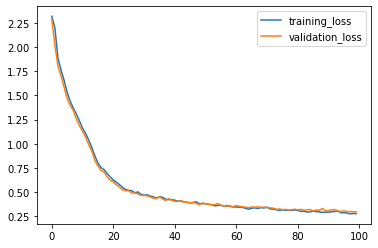

In [116]:
plt.plot(history_d.history['loss'], label='training_loss')
plt.plot(history_d.history['val_loss'], label='validation_loss')
plt.legend()

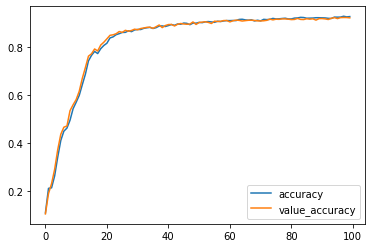

In [117]:
plt.plot(history_d.history['accuracy'], label='accuracy')
plt.plot(history_d.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [118]:
model_d.evaluate(X_train, y_train), model_d.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.9146


([0.28710272908210754, 0.9234166741371155],
 [0.3295612037181854, 0.9146000146865845])

**What accuracy do you reach?**
92% on train and 91% on test data

**Is the network overfitting?**
Think so. The loss picks up on random wiggling of the train data.

### Early Stopping

In [122]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=3)
history_d_with_stopping = model_d.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 1s 5ms/step - loss: 0.2796 - accuracy: 0.9261 - val_loss: 0.2843 - val_accuracy: 0.9249
Epoch 2/100
96/96 [==============================] - 1s 5ms/step - loss: 0.2710 - accuracy: 0.9290 - val_loss: 0.2897 - val_accuracy: 0.9216
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 0.2700 - accuracy: 0.9285 - val_loss: 0.2828 - val_accuracy: 0.9245
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.9326 - val_loss: 0.2754 - val_accuracy: 0.9268
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2657 - accuracy: 0.9287 - val_loss: 0.2831 - val_accuracy: 0.9267
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 0.2676 - accuracy: 0.9299 - val_loss: 0.2905 - val_accuracy: 0.9259
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.2807 - accuracy: 0.9265 - val_loss: 0.3239 - val_accuracy: 0.9125


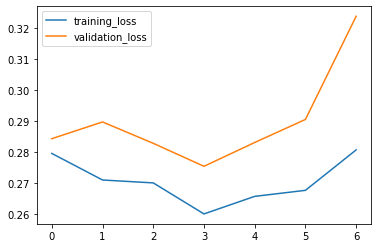

In [123]:
plt.plot(history_d_with_stopping.history['loss'], label='training_loss')
plt.plot(history_d_with_stopping.history['val_loss'], label='validation_loss')
plt.legend()

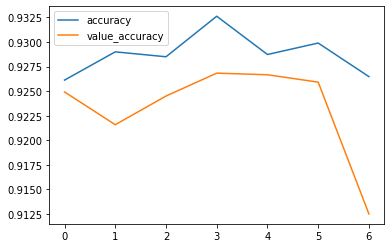

In [124]:
plt.plot(history_d_with_stopping.history['accuracy'], label='accuracy')
plt.plot(history_d_with_stopping.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [125]:
model_d.evaluate(X_train, y_train), model_d.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.9141


([0.30349454283714294, 0.9174333214759827],
 [0.3312316834926605, 0.9140999913215637])

stopped after 4 epochs, slightly worse on model's accuracy

## BatchNormalization

In [127]:
from tensorflow.keras.layers import BatchNormalization

model_e = Sequential([
    Dense(units=25 ,activation='relu', input_shape=(784,)), # hidden layer
        BatchNormalization(),
    Dense(units=25, activation='relu'), # second hidden layer, 25 neurons
        BatchNormalization(),
    Dense(units=25, activation='relu'), # third hidden layer, 25 neurons
        BatchNormalization(),
    Dense(units=25, activation='relu'), # fourth hidden layer, 25 neurons
        BatchNormalization(),
    Dense(units=25, activation='relu'), # fifth hidden layer, 25 neurons
        BatchNormalization(),
    Dense(units=10, activation='softmax') # output layer
])

In [128]:
model_e.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
history_e = model_e.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 2s 8ms/step - loss: 1.7279 - accuracy: 0.4451 - val_loss: 1.3529 - val_accuracy: 0.6718
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 0.5092 - accuracy: 0.8582 - val_loss: 0.5022 - val_accuracy: 0.8756
Epoch 3/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3093 - accuracy: 0.9135 - val_loss: 0.2871 - val_accuracy: 0.9187
Epoch 4/100
96/96 [==============================] - 1s 8ms/step - loss: 0.2234 - accuracy: 0.9372 - val_loss: 0.2244 - val_accuracy: 0.9366
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 0.1911 - accuracy: 0.9439 - val_loss: 0.1973 - val_accuracy: 0.9437
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 0.1587 - accuracy: 0.9543 - val_loss: 0.1809 - val_accuracy: 0.9473
Epoch 7/100
96/96 [==============================] - 1s 7ms/step - loss: 0.1469 - accuracy: 0.9581 - val_loss: 0.1767 - val_accuracy: 0.9483
Epoch 8/100
9

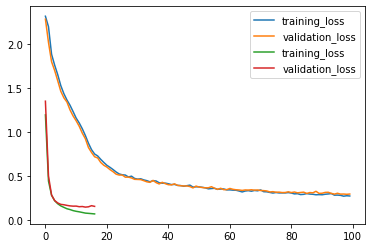

In [129]:
plt.plot(history_d.history['loss'], label='training_loss')
plt.plot(history_d.history['val_loss'], label='validation_loss')
plt.plot(history_e.history['loss'], label='training_loss')
plt.plot(history_e.history['val_loss'], label='validation_loss')
plt.legend()

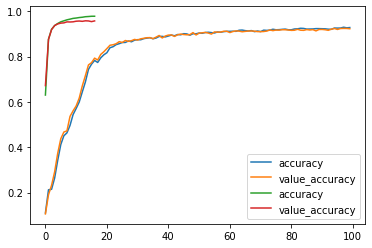

In [130]:
plt.plot(history_d.history['accuracy'], label='accuracy')
plt.plot(history_d.history['val_accuracy'], label='value_accuracy')
plt.plot(history_e.history['accuracy'], label='accuracy')
plt.plot(history_e.history['val_accuracy'], label='value_accuracy')
plt.legend()

overfits, as curves move away from each other again

In [131]:
model_e.evaluate(X_train, y_train), model_e.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1639 - accuracy: 0.9559


([0.08475641161203384, 0.9748833179473877],
 [0.16388021409511566, 0.9559000134468079])

BatchNormalization helps a lot improving the score

## Dropout

In [132]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

model_f = Sequential([
    Dense(units=25, input_shape=(784,)), # first hidden layer
    Dropout(0.5),
    Activation('relu'), 
        BatchNormalization(),
    Dense(25), # second hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # third hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fourth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fifth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(units=10, activation='softmax') # output layer
])

In [133]:
model_f.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
history_f = model_f.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 3s 10ms/step - loss: 2.6578 - accuracy: 0.1084 - val_loss: 2.1773 - val_accuracy: 0.2071
Epoch 2/100
96/96 [==============================] - 1s 7ms/step - loss: 2.2886 - accuracy: 0.1525 - val_loss: 2.0186 - val_accuracy: 0.3286
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 2.1166 - accuracy: 0.1992 - val_loss: 1.8621 - val_accuracy: 0.3961
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 1.9945 - accuracy: 0.2445 - val_loss: 1.7002 - val_accuracy: 0.4646
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 1.8989 - accuracy: 0.2757 - val_loss: 1.6133 - val_accuracy: 0.4618
Epoch 6/100
96/96 [==============================] - 1s 7ms/step - loss: 1.8013 - accuracy: 0.3119 - val_loss: 1.5263 - val_accuracy: 0.5138
Epoch 7/100
96/96 [==============================] - 1s 7ms/step - loss: 1.7356 - accuracy: 0.3398 - val_loss: 1.4176 - val_accuracy: 0.5679
Epoch 8/100


In [136]:
model_f.evaluate(X_train, y_train), model_f.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9468 - accuracy: 0.5971


([0.9402750730514526, 0.600600004196167],
 [0.9468345642089844, 0.597100019454956])

Dropout in every layer does not help at all. Contrary, it disturbs.

In [137]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

model_f1 = Sequential([
    Dense(units=25, input_shape=(784,)), # first hidden layer
    #Dropout(0.5),
    Activation('relu'), 
        BatchNormalization(),
    Dense(25), # second hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # third hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fourth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fifth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(units=10, activation='softmax') # output layer
])
model_f1.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
history_f1 = model_f1.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 2s 10ms/step - loss: 2.5753 - accuracy: 0.1244 - val_loss: 1.8800 - val_accuracy: 0.3756
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 2.1181 - accuracy: 0.2115 - val_loss: 1.7683 - val_accuracy: 0.4209
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 1.9474 - accuracy: 0.2750 - val_loss: 1.6103 - val_accuracy: 0.5628
Epoch 4/100
96/96 [==============================] - 1s 9ms/step - loss: 1.8063 - accuracy: 0.3379 - val_loss: 1.4525 - val_accuracy: 0.6631
Epoch 5/100
96/96 [==============================] - 1s 7ms/step - loss: 1.6863 - accuracy: 0.3887 - val_loss: 1.2637 - val_accuracy: 0.7573
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 1.5749 - accuracy: 0.4353 - val_loss: 1.1417 - val_accuracy: 0.7606
Epoch 7/100
96/96 [==============================] - 1s 9ms/step - loss: 1.4841 - accuracy: 0.4644 - val_loss: 1.0237 - val_accuracy: 0.7665
Epoch 8/100


In [138]:
model_f1.evaluate(X_train, y_train), model_f1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5626 - accuracy: 0.8909


([0.5064150094985962, 0.8964666724205017],
 [0.5626206994056702, 0.8909000158309937])

Omitting Dropout on the first layer improves performance notably.

In [139]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

model_f2 = Sequential([
    Dense(units=25, input_shape=(784,)), # first hidden layer
    #Dropout(0.5),
    Activation('relu'), 
        BatchNormalization(),
    Dense(25), # second hidden layer, 25 neurons
    #Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # third hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fourth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fifth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(units=10, activation='softmax') # output layer
])
model_f2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
history_f2 = model_f2.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 3s 11ms/step - loss: 2.5297 - accuracy: 0.1374 - val_loss: 1.7395 - val_accuracy: 0.5380
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 1.9142 - accuracy: 0.3275 - val_loss: 1.2281 - val_accuracy: 0.7531
Epoch 3/100
96/96 [==============================] - 1s 8ms/step - loss: 1.6024 - accuracy: 0.4531 - val_loss: 0.9155 - val_accuracy: 0.8509
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 1.3975 - accuracy: 0.5324 - val_loss: 0.7674 - val_accuracy: 0.8809
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 1.2568 - accuracy: 0.5810 - val_loss: 0.6636 - val_accuracy: 0.8975
Epoch 6/100
96/96 [==============================] - 1s 7ms/step - loss: 1.1349 - accuracy: 0.6266 - val_loss: 0.5991 - val_accuracy: 0.9103
Epoch 7/100
96/96 [==============================] - 1s 7ms/step - loss: 1.0699 - accuracy: 0.6520 - val_loss: 0.5397 - val_accuracy: 0.9147
Epoch 8/100


In [140]:
model_f2.evaluate(X_train, y_train), model_f2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2518 - accuracy: 0.9491


([0.1823424994945526, 0.9620333313941956],
 [0.2517935633659363, 0.9491000175476074])

Much better performance again omitting Dropout on first two layers

In [142]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

model_f3 = Sequential([
    Dense(units=25, input_shape=(784,)), # first hidden layer
    #Dropout(0.5),
    Activation('relu'), 
        BatchNormalization(),
    Dense(25), # second hidden layer, 25 neurons
    #Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # third hidden layer, 25 neurons
    #Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fourth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fifth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(units=10, activation='softmax') # output layer
])
model_f3.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
history_f3 = model_f3.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 2s 11ms/step - loss: 2.3962 - accuracy: 0.1964 - val_loss: 1.3467 - val_accuracy: 0.6857
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 1.5075 - accuracy: 0.5026 - val_loss: 0.7820 - val_accuracy: 0.8525
Epoch 3/100
96/96 [==============================] - 1s 6ms/step - loss: 1.1822 - accuracy: 0.6316 - val_loss: 0.5518 - val_accuracy: 0.8962
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 0.9934 - accuracy: 0.7002 - val_loss: 0.4464 - val_accuracy: 0.9130
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 0.8760 - accuracy: 0.7397 - val_loss: 0.3804 - val_accuracy: 0.9273
Epoch 6/100
96/96 [==============================] - 1s 6ms/step - loss: 0.7992 - accuracy: 0.7641 - val_loss: 0.3356 - val_accuracy: 0.9323
Epoch 7/100
96/96 [==============================] - 1s 6ms/step - loss: 0.7344 - accuracy: 0.7863 - val_loss: 0.2871 - val_accuracy: 0.9414
Epoch 8/100


In [143]:
model_f3.evaluate(X_train, y_train), model_f3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1962 - accuracy: 0.9565


([0.1371346414089203, 0.9698666930198669],
 [0.19621136784553528, 0.9564999938011169])

No further improvement. Seems using Dropout in first layers hurts, in last layers it doesn't matter

In [144]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

model_f4 = Sequential([
    Dense(units=25, input_shape=(784,)), # first hidden layer
    #Dropout(0.5),
    Activation('relu'), 
        BatchNormalization(),
    Dense(25), # second hidden layer, 25 neurons
    #Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # third hidden layer, 25 neurons
    #Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fourth hidden layer, 25 neurons
    #Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(25), # fifth hidden layer, 25 neurons
    Dropout(0.5),
    Activation('relu'),
        BatchNormalization(),
    Dense(units=10, activation='softmax') # output layer
])
model_f4.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = EarlyStopping(monitor='val_loss', patience=3)
history_f4 = model_f4.fit(X_train, y_train, batch_size=500, epochs=100, callbacks=[callback], validation_split=0.2)

Epoch 1/100
96/96 [==============================] - 2s 10ms/step - loss: 2.1359 - accuracy: 0.2877 - val_loss: 1.3574 - val_accuracy: 0.6432
Epoch 2/100
96/96 [==============================] - 1s 6ms/step - loss: 1.0270 - accuracy: 0.7071 - val_loss: 0.5956 - val_accuracy: 0.8894
Epoch 3/100
96/96 [==============================] - 1s 7ms/step - loss: 0.7005 - accuracy: 0.8177 - val_loss: 0.3370 - val_accuracy: 0.9215
Epoch 4/100
96/96 [==============================] - 1s 6ms/step - loss: 0.5409 - accuracy: 0.8647 - val_loss: 0.2572 - val_accuracy: 0.9331
Epoch 5/100
96/96 [==============================] - 1s 8ms/step - loss: 0.4610 - accuracy: 0.8846 - val_loss: 0.2183 - val_accuracy: 0.9419
Epoch 6/100
96/96 [==============================] - 1s 8ms/step - loss: 0.4016 - accuracy: 0.8997 - val_loss: 0.2145 - val_accuracy: 0.9419
Epoch 7/100
96/96 [==============================] - 1s 8ms/step - loss: 0.3676 - accuracy: 0.9074 - val_loss: 0.1934 - val_accuracy: 0.9467
Epoch 8/100


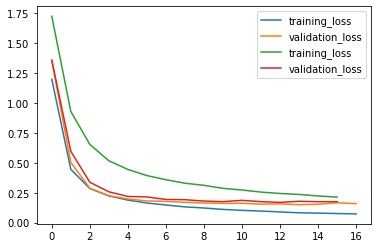

In [145]:
plt.plot(history_e.history['loss'], label='training_loss')
plt.plot(history_e.history['val_loss'], label='validation_loss')
plt.plot(history_f4.history['loss'], label='training_loss')
plt.plot(history_f4.history['val_loss'], label='validation_loss')
plt.legend()

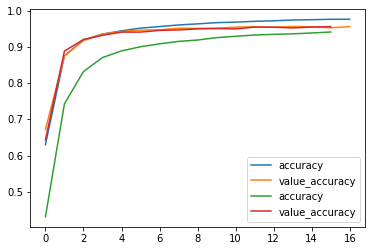

In [147]:
plt.plot(history_e.history['accuracy'], label='accuracy')
plt.plot(history_e.history['val_accuracy'], label='value_accuracy')
plt.plot(history_f4.history['accuracy'], label='accuracy')
plt.plot(history_f4.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [148]:
model_e.evaluate(X_train, y_train), model_e.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1639 - accuracy: 0.9559


([0.08475641161203384, 0.9748833179473877],
 [0.16388021409511566, 0.9559000134468079])

In [149]:
model_f4.evaluate(X_train, y_train), model_f4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1706 - accuracy: 0.9570


([0.10650119930505753, 0.9723666906356812],
 [0.17059257626533508, 0.9570000171661377])

## So far best self-built model: f4 (with five layers, activation relu, batch normalization in every layer, dropout in fifth layer, softmax activation for output)

## Compare to CNN -> MaxPooling -> softmax model

# CNN 

https://victorzhou.com/blog/keras-cnn-tutorial/

In [150]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow.keras.datasets import mnist

#Get fresh data without reshaping
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images.
X_train_norm = (X_train / 255) - 0.5
X_test_norm = (X_test / 255) - 0.5

# Reshape the images. Add extra 
X_train_norm = np.expand_dims(X_train_norm, axis=3)
X_test_norm = np.expand_dims(X_test_norm, axis=3)

print(X_train_norm.shape) # (60000, 28, 28, 1)
print(X_test_norm.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [151]:
num_filters = 8 # filter measure of how close input resembles a feature (= line, arch), number of features
filter_size = 3 # filter 3x3 moved across the image from left to right and up to down
pool_size = 2 # filter 2x2 for MaxPooling

model_c = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)), #first hidden layer
    MaxPooling2D(pool_size=pool_size), #second hidden layer
    Flatten(), # reshape output of second layer to make it flat for the last layer
    Dense(units=10, activation='softmax') # output layer
])

model_c.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
y_train = to_categorical(y_train)

history_c = model_c.fit(X_train_norm, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6437 - accuracy: 0.8157 - val_loss: 0.2509 - val_accuracy: 0.9293
Epoch 2/3
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2590 - accuracy: 0.9275 - val_loss: 0.1937 - val_accuracy: 0.9482
Epoch 3/3
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1886 - accuracy: 0.9481 - val_loss: 0.1504 - val_accuracy: 0.9601


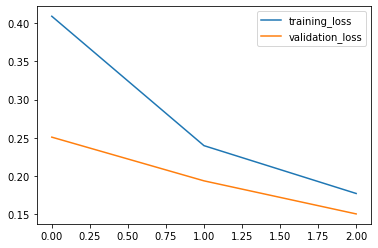

In [153]:
plt.plot(history_c.history['loss'], label='training_loss')
plt.plot(history_c.history['val_loss'], label='validation_loss')
plt.legend()

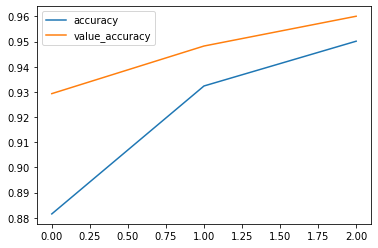

In [154]:
plt.plot(history_c.history['accuracy'], label='accuracy')
plt.plot(history_c.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [155]:
model_c.evaluate(X_train_norm, y_train), model_c.evaluate(X_test_norm, to_categorical(y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.1582 - accuracy: 0.9573


([0.14838247001171112, 0.9589166641235352],
 [0.1582057923078537, 0.9573000073432922])

About as good performance as with model f4:

In [160]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, -1)
y_train = to_categorical(y_train)
X_test = X_test.reshape(10000, -1)
y_test = to_categorical(y_test)
model_f4.evaluate(X_train, y_train), model_f4.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9570


([0.10650119930505753, 0.9723666906356812],
 [0.17059257626533508, 0.9570000171661377])

### Try and improve the most simple CNN with another layer and such

In [26]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow.keras.datasets import mnist

#Get fresh data without reshaping
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images.
X_train_norm = (X_train / 255) - 0.5
X_test_norm = (X_test / 255) - 0.5

# Reshape the images. Add extra 
X_train_norm = np.expand_dims(X_train_norm, axis=3)
X_test_norm = np.expand_dims(X_test_norm, axis=3)

print(X_train_norm.shape) # (60000, 28, 28, 1)
print(X_test_norm.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [27]:
num_filters = 8 # filter measure of how close input resembles a feature (= line, arch), number of features
filter_size = 3 # filter 3x3 moved across the image from left to right and up to down
pool_size = 2 # filter 2x2 for MaxPooling

model_c2 = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)), #first hidden layer
    MaxPooling2D(pool_size=pool_size), #second hidden layer
    Conv2D(num_filters, filter_size), #first hidden layer
    MaxPooling2D(pool_size=pool_size),
    Flatten(), # reshape output of second layer to make it flat for the last layer
    Dense(units=10, activation='softmax') # output layer
])

model_c2.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
y_train = to_categorical(y_train)

history_c2 = model_c2.fit(X_train_norm, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 17s 11ms/step - loss: 0.7397 - accuracy: 0.7733 - val_loss: 0.1538 - val_accuracy: 0.9557
Epoch 2/3
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1448 - accuracy: 0.9568 - val_loss: 0.1071 - val_accuracy: 0.9689
Epoch 3/3
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1078 - accuracy: 0.9676 - val_loss: 0.0983 - val_accuracy: 0.9702


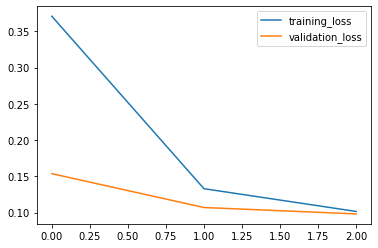

In [29]:
plt.plot(history_c2.history['loss'], label='training_loss')
plt.plot(history_c2.history['val_loss'], label='validation_loss')
plt.legend()

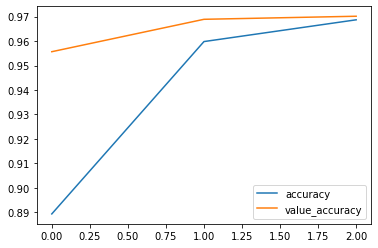

In [30]:
plt.plot(history_c2.history['accuracy'], label='accuracy')
plt.plot(history_c2.history['val_accuracy'], label='value_accuracy')
plt.legend()

In [31]:
model_c2.evaluate(X_train_norm, y_train), model_c2.evaluate(X_test_norm, to_categorical(y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9714


([0.09090161323547363, 0.9722499847412109],
 [0.08422321081161499, 0.9714000225067139])